In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

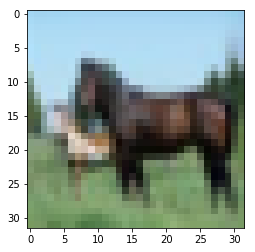

In [6]:
plt.imshow(x_train[12])

In [7]:
x_train[0].max()

255

In [8]:
x_train = x_train / 255

In [9]:
x_test = x_test / 255

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train = to_categorical(y_train, 10)

In [14]:
y_cat_test = to_categorical(y_test, 10)

In [15]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
y_train[0]

array([6], dtype=uint8)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [18]:
model = Sequential()

# convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

# convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [22]:
model.fit(x_train, y_cat_train, epochs=15, 
          validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 29s 18ms/step - accuracy: 0.4493 - loss: 1.5301 - val_accuracy: 0.5385 - val_loss: 1.2847
Epoch 2/15
1563/1563 [==============================] - 28s 18ms/step - accuracy: 0.5890 - loss: 1.1729 - val_accuracy: 0.5711 - val_loss: 1.2582
Epoch 3/15
1563/1563 [==============================] - 30s 19ms/step - accuracy: 0.6429 - loss: 1.0261 - val_accuracy: 0.6246 - val_loss: 1.0726
Epoch 4/15
1563/1563 [==============================] - 26s 17ms/step - accuracy: 0.6801 - loss: 0.9256 - val_accuracy: 0.6424 - val_loss: 1.0644
Epoch 5/15
1563/1563 [==============================] - 25s 16ms/step - accuracy: 0.7108 - loss: 0.8426 - val_accuracy: 0.6690 - val_loss: 0.9762
Epoch 6/15
1563/1563 [==============================] - 26s 16ms/step - accuracy: 0.7328 - loss: 0.7832 - val_accuracy: 0.6555 - val_loss: 1.0445
Epoch 7/15
1563/1563 [==============================] - 26s 17ms/step - accuracy: 0.7520 - loss: 0.7274 - val_accuracy: 0.65

In [23]:
metrics = pd.DataFrame(model.history.history)

In [24]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.44934,1.530134,0.5385,1.284713
1,0.58904,1.172884,0.5711,1.258247
2,0.64292,1.026082,0.6246,1.072572
3,0.68008,0.925608,0.6424,1.064403
4,0.71084,0.842551,0.6690,0.976249
5,0.73280,0.783152,0.6555,1.044454
6,0.75204,0.727429,0.6543,1.207317


In [25]:
metrics.columns

Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')

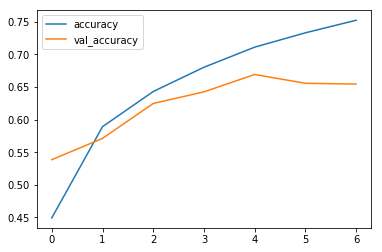

In [26]:
metrics[['accuracy', 'val_accuracy']].plot()

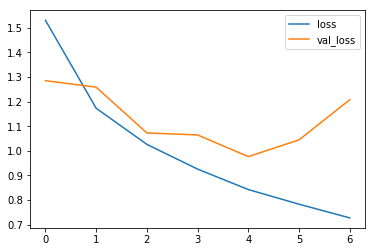

In [27]:
metrics[['loss', 'val_loss']].plot()

In [28]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.2073166370391846, 0.6542999744415283]

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1000
           1       0.77      0.79      0.78      1000
           2       0.71      0.43      0.54      1000
           3       0.55      0.39      0.45      1000
           4       0.65      0.61      0.63      1000
           5       0.51      0.64      0.57      1000
           6       0.91      0.56      0.70      1000
           7       0.65      0.74      0.69      1000
           8       0.75      0.77      0.76      1000
           9       0.53      0.88      0.66      1000

   micro avg       0.65      0.65      0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000



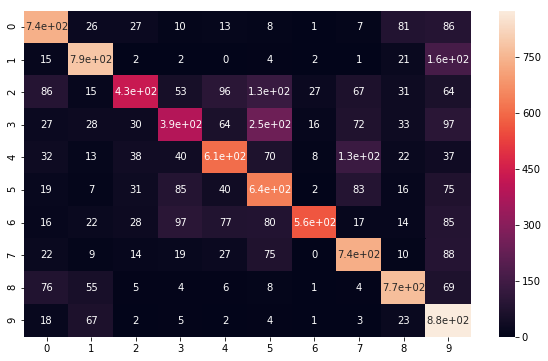

In [34]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

In [35]:
my_image = x_test[0]

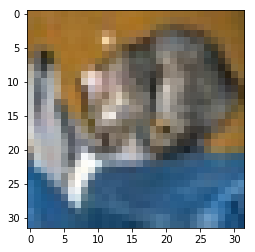

In [37]:
plt.imshow(my_image)

In [38]:
y_test[0]

array([3], dtype=uint8)

In [39]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3])